## Bach 

### created by Yuying Liu, 06/08/2020

This script is used to do sequence generation on a music excerpt from Bach’s Fugue No. 1 In C Major, BWV 846, which  can be used to reproduce a row in Figure 7.

In [1]:
# imports
import os
import sys
import torch
import numpy as np
import scipy as sp
import librosa
import librosa.display
import IPython.display as ipd
from tqdm.notebook import tqdm
from scipy import interpolate
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

module_path = os.path.abspath(os.path.join('../../src/'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
# # # # # # # # # # # # # # # # # #
#  global constants, paths, etc.  #
# # # # # # # # # # # # # # # # # #
data_dir = '../../data/Bach/'
result_dir = '../../results/Bach/'

## Part I

### process data

In [3]:
# read the raw data
init = 33750
period = 2
gap = 20
wav, sr = librosa.load(os.path.join(data_dir, 'C_major.wav'))
sig = wav[init:init+period*sr]
sampled_sig = sig[::gap]

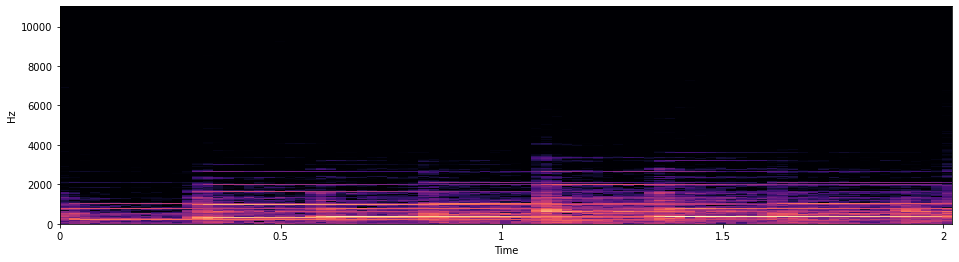

In [4]:
# viz the spectrum
X = librosa.stft(sig)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(16, 4))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

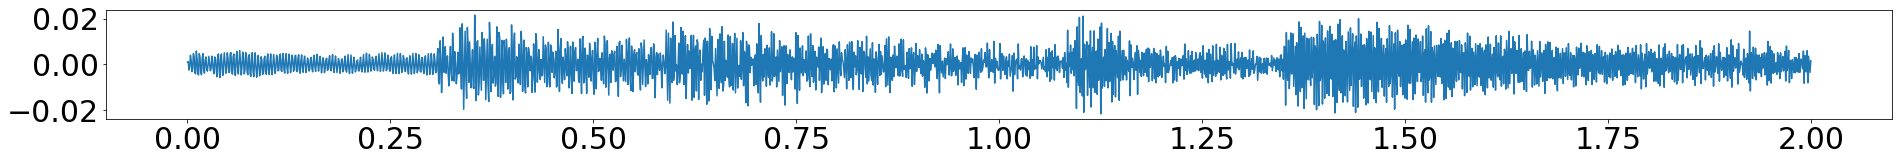

In [5]:
# plot the audio
plt.figure(figsize=(32, 2))
plt.plot(np.linspace(0, period, sampled_sig.shape[0]), sampled_sig)
plt.tick_params(axis="x", labelsize=30)
plt.tick_params(axis="y", labelsize=30)

In [6]:
# play the original audio
ipd.Audio(sig, rate=sr)
# librosa.output.write_wav(os.path.join(result_dir, 'Bach_truth.wav'), sig, sr)

In [7]:
# time-delay embedding
data = np.zeros((128, sampled_sig.shape[0]-128))
for i in range(128):
    data[i, :] = sampled_sig[i:-128+i]
np.save(os.path.join(data_dir, 'data.npy'), data)   # <-- this is the data set for training NNs
print(data.shape)

(128, 2077)


In [8]:
# trim the last
sampled_sig = sampled_sig[:-1]

### sampled signal

In [9]:
sampled_timesteps = np.linspace(0, period, len(sampled_sig))
timesteps = np.linspace(0, period, (len(sampled_sig)-1)*gap+1)

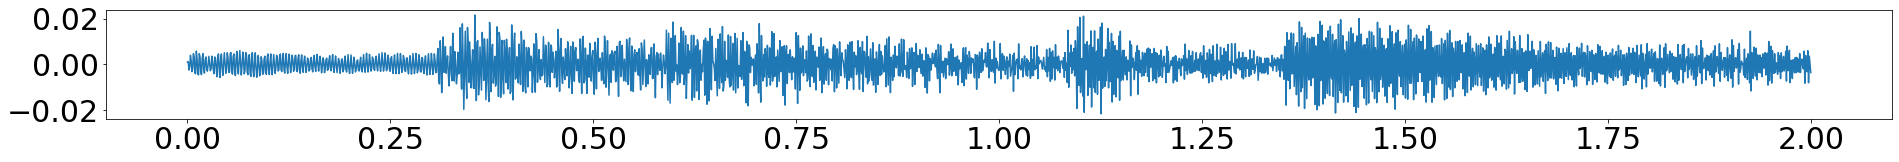

In [10]:
# plot the interpolated audio
plt.figure(figsize=(32, 2))
plt.plot(sampled_timesteps, sampled_sig)
plt.tick_params(axis="x", labelsize=30)
plt.tick_params(axis="y", labelsize=30)

([], [])

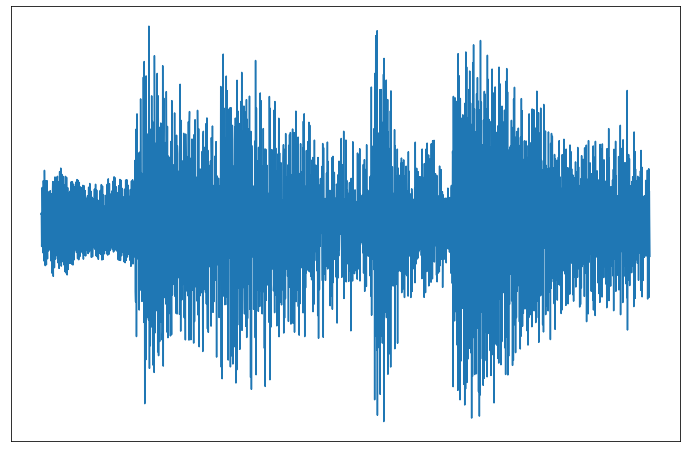

In [11]:
plt.figure(figsize=(12, 8))
plt.plot(sampled_timesteps, sampled_sig)
plt.xticks([])
plt.yticks([])

In [12]:
# play the interpolated audio
tck = interpolate.splrep(sampled_timesteps, sampled_sig)
interp_sig = interpolate.splev(timesteps, tck)
ipd.Audio(interp_sig, rate=sr)
# librosa.output.write_wav(os.path.join(result_dir, 'Bach_reduced_truth.wav'), interp_sig, sr)

## Part II

<font color='red'>Attention: use seq_generations.ipynb to train differen architectures and generate target sequences before running part II. The code below requires numpy files Bach_{model}_pred.npy. </font>

### coupled NNs

8.597481811009478e-07


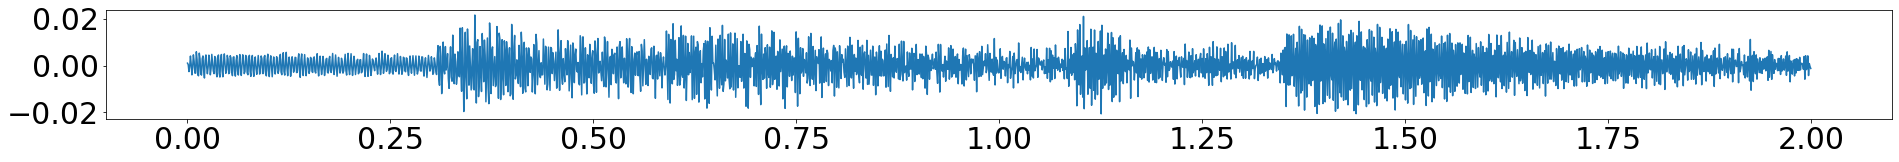

In [13]:
# coupled NN reconstruction
file_data = np.load(os.path.join(result_dir, 'Bach_couple_pred.npy'))
coupled_sig = np.zeros(sampled_sig.shape)
coupled_sig[:file_data.shape[0]] = file_data[:, 0]
coupled_sig[file_data.shape[0]:] = file_data[-1, 1:]

print(((coupled_sig - sampled_sig)**2).mean())
plt.figure(figsize=(32, 2))
plt.plot(sampled_timesteps, coupled_sig)
plt.tick_params(axis="x", labelsize=30)
plt.tick_params(axis="y", labelsize=30)

(-0.025, 0.025)

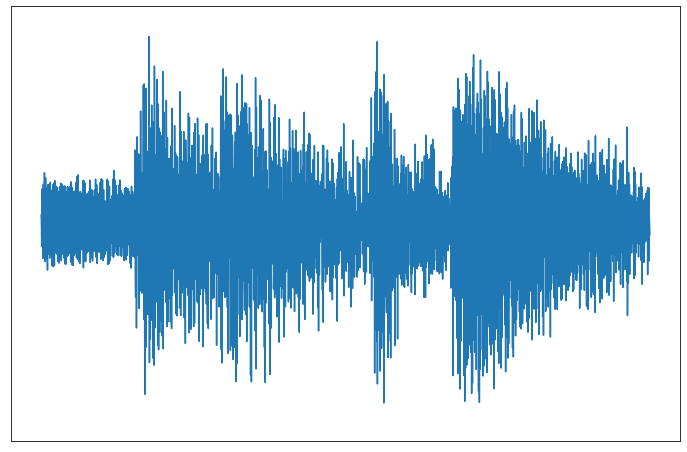

In [14]:
plt.figure(figsize=(12, 8))
plt.plot(sampled_timesteps, coupled_sig)
plt.xticks([])
plt.yticks([])
plt.ylim([-0.025, 0.025])

In [15]:
# play the interpolated audio from coupled nn
coupled_tck = interpolate.splrep(sampled_timesteps, coupled_sig)
interp_coupled_sig = interpolate.splev(timesteps, coupled_tck)
ipd.Audio(interp_coupled_sig, rate=sr)
# librosa.output.write_wav(os.path.join(result_dir, 'Bach_HiTS_pred.wav'), interp_coupled_sig, sr)

### lstm

4.6472149611532044e-05


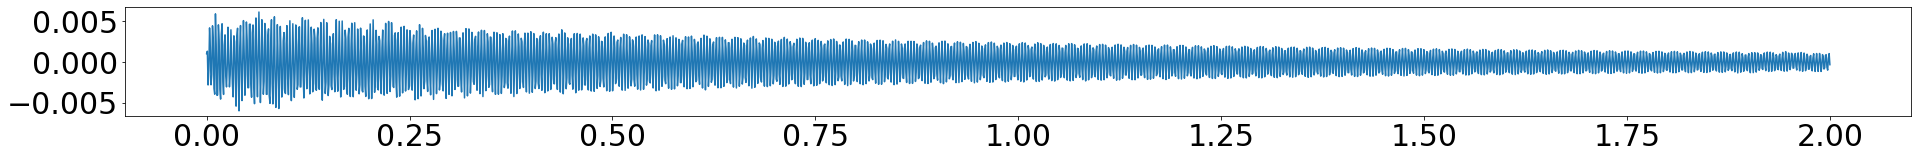

In [16]:
# lstm reconstruction
file_data = np.load(os.path.join(result_dir, 'Bach_lstm_pred.npy'))
lstm_sig = np.zeros(sampled_sig.shape)
lstm_sig[:file_data.shape[0]] = file_data[:, 0]
lstm_sig[file_data.shape[0]:] = file_data[-1, 1:]

print(((lstm_sig - sampled_sig)**2).mean())
plt.figure(figsize=(32, 2))
plt.plot(sampled_timesteps, lstm_sig)
plt.tick_params(axis="x", labelsize=30)
plt.tick_params(axis="y", labelsize=30)

(-0.025, 0.025)

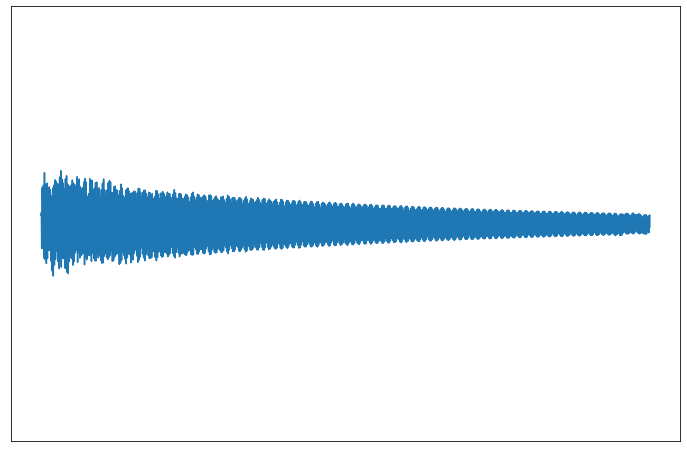

In [17]:
plt.figure(figsize=(12, 8))
plt.plot(sampled_timesteps, lstm_sig)
plt.xticks([])
plt.yticks([])
plt.ylim([-0.025, 0.025])

In [18]:
# play the interpolated audio from coupled nn
lstm_tck = interpolate.splrep(sampled_timesteps, lstm_sig)
interp_lstm_sig = interpolate.splev(timesteps, lstm_tck)
ipd.Audio(interp_lstm_sig, rate=sr)
# librosa.output.write_wav(os.path.join(result_dir, 'Bach_LSTM_pred.wav'), interp_lstm_sig, sr)

### reservoir computing

0.0002691250164189398


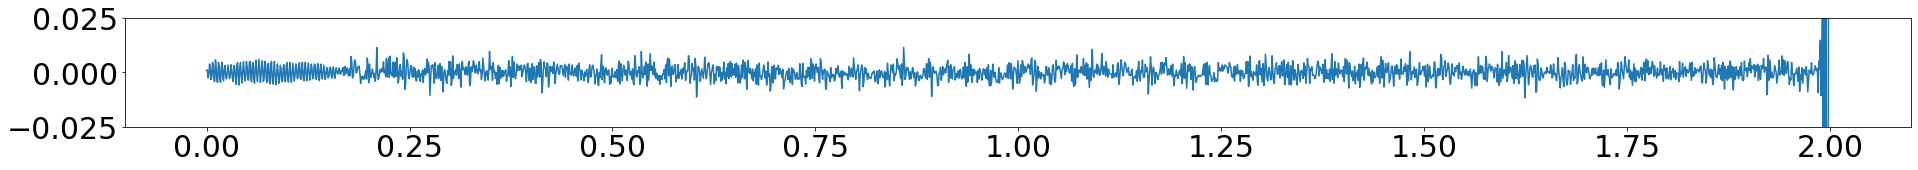

In [19]:
# esn reconstruction
file_data = np.load(os.path.join(result_dir, 'Bach_reservoir_pred.npy'))
reservoir_sig = np.zeros(sampled_sig.shape)
reservoir_sig[:file_data.shape[0]] = file_data[:, 0]
reservoir_sig[file_data.shape[0]:] = file_data[-1, 1:]

print(((reservoir_sig - sampled_sig)**2).mean())
plt.figure(figsize=(32, 2))
plt.plot(sampled_timesteps, reservoir_sig)
plt.ylim([-0.025, 0.025])
plt.tick_params(axis="x", labelsize=30)
plt.tick_params(axis="y", labelsize=30)

(-0.02, 0.02)

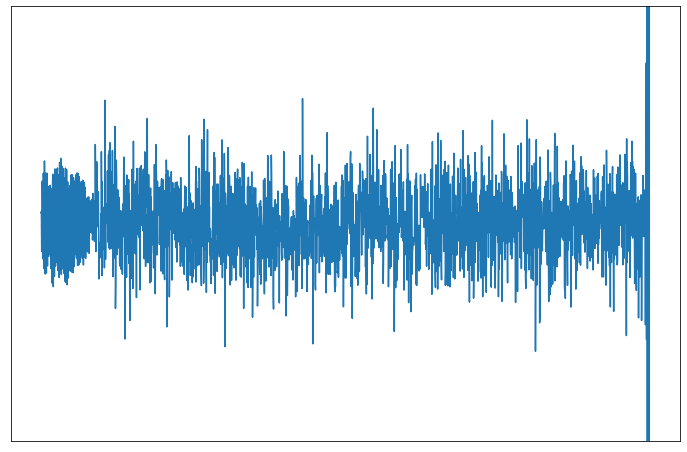

In [20]:
plt.figure(figsize=(12, 8))
plt.plot(sampled_timesteps, reservoir_sig)
plt.xticks([])
plt.yticks([])
plt.ylim([-0.02, 0.02])

In [21]:
# play the interpolated audio from coupled nn
reservoir_tck = interpolate.splrep(sampled_timesteps, reservoir_sig)
interp_reservoir_sig = interpolate.splev(timesteps, reservoir_tck)
ipd.Audio(interp_reservoir_sig, rate=sr)
# librosa.output.write_wav(os.path.join(result_dir, 'Bach_Reservoir_pred.wav'), interp_reservoir_sig, sr)

### cwrnn

4.7017722909734455e-05


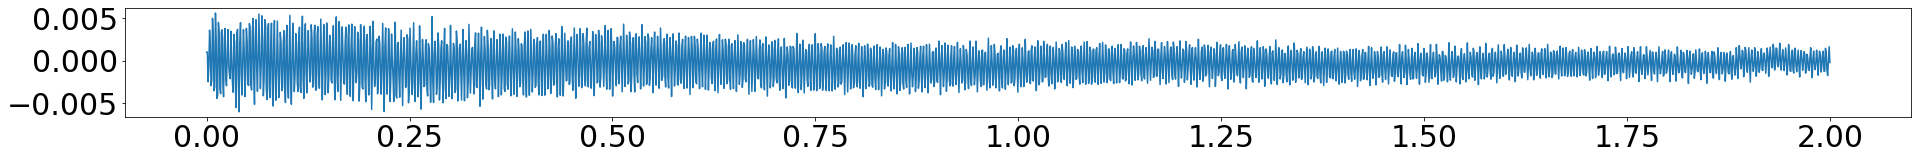

In [22]:
# cwrnn reconstruction
file_data = np.load(os.path.join(result_dir, 'Bach_cwrnn_pred.npy'))
cwrnn_sig = np.zeros(sampled_sig.shape)
cwrnn_sig[:file_data.shape[0]] = file_data[:, 0]
cwrnn_sig[file_data.shape[0]:] = file_data[-1, 1:]

print(((cwrnn_sig - sampled_sig)**2).mean())
plt.figure(figsize=(32, 2))
plt.plot(sampled_timesteps, cwrnn_sig)
plt.tick_params(axis="x", labelsize=30)
plt.tick_params(axis="y", labelsize=30)

(-0.02, 0.02)

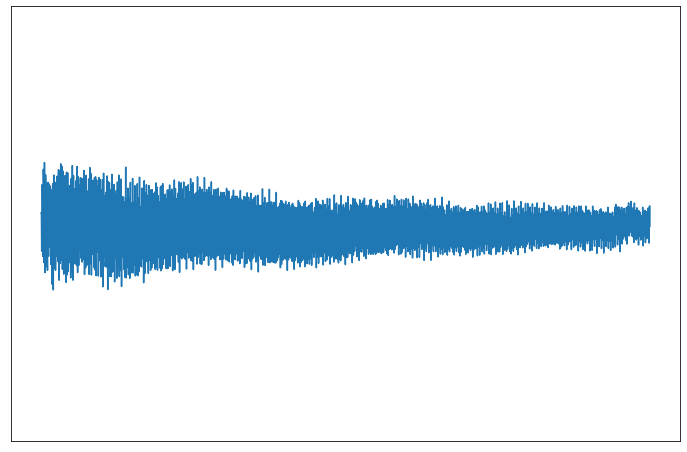

In [23]:
plt.figure(figsize=(12, 8))
plt.plot(sampled_timesteps, cwrnn_sig)
plt.xticks([])
plt.yticks([])
plt.ylim([-0.02, 0.02])

In [24]:
# play the interpolated audio from coupled nn
cwrnn_tck = interpolate.splrep(sampled_timesteps, cwrnn_sig)
interp_cwrnn_sig = interpolate.splev(timesteps, cwrnn_tck)
ipd.Audio(interp_cwrnn_sig, rate=sr)
# librosa.output.write_wav(os.path.join(result_dir, 'Bach_CWRNN_pred.wav'), interp_cwrnn_sig, sr)